
!pip install requests


In [1]:
import re
import nltk
import string
import requests
import pandas as pd
import gensim
import pyLDAvis.gensim
from bs4 import BeautifulSoup
import matplotlib.pyplot as plotter
from textblob import TextBlob
from gensim import corpora
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

%matplotlib inline

In [14]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/santanubhattacharjee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
#INDIN MOUNTAINS AND HILLS
    
page=requests.get("https://www.tripadvisor.in/Search?redirect&uiOrigin=MASTHEAD&ssrc=A&pid=3826&searchSessionId=37E564A4CB4190AFA119B49961CB043C1556604526217ssid&supportedSearchTypes=find_near_stand_alone_query&searchNearby&geo=293860&q=hill%20and%20mountains&enableNearPage=true&social_typeahead_2018_feature=true&returnTo=https%253A__2F____2F__www__2E__tripadvisor__2E__in__2F__Attraction__5F__Products__2D__g293860__2D__India__2E__html&startTime=1556604535808&sid=37E564A4CB4190AFA119B49961CB043C1556604563513&rf=1")
soup=BeautifulSoup(page.content,'html.parser')

In [15]:
# MOUNTAIN ABU

ABU_page=requests.get("https://www.tripadvisor.in/Attraction_Review-g679012-d1654356-Reviews-Mount_Abu-Mount_Abu_Sirohi_District_Rajasthan.html")
ABUsoup = BeautifulSoup(ABU_page.content,'html.parser')

In [41]:
# ABU RATINGS

tag_list_1 = ABUsoup.find_all(class_ = 'row_num is-shown-at-tablet')

for rating in tag_list_1 :
 print(rating.get_text())

311
292
119
31
25


## Getting all TripAdvisor URLs list

In [2]:
# ABU REVIEW URLS


def getTripadvisorUrls(reviewCount):
    start_url = 'https://www.tripadvisor.in/Attraction_Review-g679012-d1654356-Reviews-or'
    end_url = '-Mount_Abu-Mount_Abu_Sirohi_District_Rajasthan.html'
    start_value = 10
    end_value = reviewCount
    urls_list = []

    for i in range(10,end_value,10):
        full_url = start_url + str(i) + end_url
        urls_list.append(full_url)

    return urls_list

getTripadvisorUrls(2010)


['https://www.tripadvisor.in/Attraction_Review-g679012-d1654356-Reviews-or10-Mount_Abu-Mount_Abu_Sirohi_District_Rajasthan.html',
 'https://www.tripadvisor.in/Attraction_Review-g679012-d1654356-Reviews-or20-Mount_Abu-Mount_Abu_Sirohi_District_Rajasthan.html',
 'https://www.tripadvisor.in/Attraction_Review-g679012-d1654356-Reviews-or30-Mount_Abu-Mount_Abu_Sirohi_District_Rajasthan.html',
 'https://www.tripadvisor.in/Attraction_Review-g679012-d1654356-Reviews-or40-Mount_Abu-Mount_Abu_Sirohi_District_Rajasthan.html',
 'https://www.tripadvisor.in/Attraction_Review-g679012-d1654356-Reviews-or50-Mount_Abu-Mount_Abu_Sirohi_District_Rajasthan.html',
 'https://www.tripadvisor.in/Attraction_Review-g679012-d1654356-Reviews-or60-Mount_Abu-Mount_Abu_Sirohi_District_Rajasthan.html',
 'https://www.tripadvisor.in/Attraction_Review-g679012-d1654356-Reviews-or70-Mount_Abu-Mount_Abu_Sirohi_District_Rajasthan.html',
 'https://www.tripadvisor.in/Attraction_Review-g679012-d1654356-Reviews-or80-Mount_Abu-Mou

## Getting all reviews from every url found from previous function

In [3]:
#ABU REVIEWS

urls = getTripadvisorUrls(2010)
reviews = []

for url in urls:
    # Get http object and soap object
    page = requests.get(url)
    ABUsoup = BeautifulSoup(page.content, 'html.parser')
    
    # Find all reviews
    reviews_list = ABUsoup.find_all('div',class_ = "prw_rup prw_reviews_text_summary_hsx")
    for review in reviews_list:
        reviews.append(review.get_text())

print(reviews)

['Arrived at Abu road by train from delhI (12 hrs ) and 30 minuted drive to Shantiban . Wonderful place , peace and serenity found in all aspect . Next day, took bus to mt abu sanctuary , great place of spirituality and of course...More', 'You can find hotel of all types and budgets. So much to view and remain active during your stay. wide varieties of food available to your choice.', 'Mount abu is as very beautiful place 🌺 The view from my balcony was amazing and so refreshing 😍 I was mesmerized by the beauty of the mountains 🌺 A very hygienic and clean place it is 🌺 Everyone should go there at least once...More', 'It can definitely improve with respect to the overall cleanliness. The guru Shikhar view point, nakki lake, delwara temple is nice', 'Best place to go after 6PM.\n\nPros\nVery friendly and you can spend good time with your family.\nNear to Bus stand and Main Markets.\n\nCons\nVery much insects in rainy seasons', 'Crowded picnic point...lot of renovation is going on...but ni

## Saving reviews to dataframe and then to CSV file

In [4]:
# Saving the reviews list to python dataframe (Table with one column)

data_frame = pd.DataFrame({'Reviews':reviews})
data_frame.to_csv('Mount_Abu_Reviews.csv')
data_frame

,Reviews
0,Arrived at Abu road by train from delhI (12 hr...
1,You can find hotel of all types and budgets. S...
2,Mount abu is as very beautiful place 🌺 The vie...
3,It can definitely improve with respect to the ...
4,Best place to go after 6PM.\n\nPros\nVery frie...
5,Crowded picnic point...lot of renovation is go...
6,Definitely an important destination who love t...
7,Tooooo cold... A superb experience..carry warm...
8,Place is full of horrible hotels and western f...
9,Useless place. We have seen a number of hill s...


In [5]:
reviews[8]

'Place is full of horrible hotels and western foodchains. The tourist come here to consume and it is so expensive. The nature is very beautiful but too much commercialised.'

## Sentiment Analysis

In [6]:
for review in reviews:
    
    analysis = TextBlob(review)
    sentimentscore = analysis.sentiment[0]
    if sentimentscore > 0:
        print("Positive sentiment")
    elif sentimentscore < 0:
        print("Negative sentiment")
    else:
        print("Neutral sentiment")


Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Negative sentiment
Positive sentiment
Neutral sentiment
Negative sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Negative sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Negative sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Neutral sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive senti

Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Negative sentiment
Positive sentiment
Negative sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Neutral sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Negative sentiment
Positive sentiment
Positive sentiment
Negative sentiment
Negative sentiment
Positive sentiment
Negative sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Neutral sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive senti

Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Neutral sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Neutral sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Neutral sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Neutral sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Neutral sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentimen

Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Neutral sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Neutral sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Neutral sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Neutral sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Neutral sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentiment
Positive sentimen

In [7]:
positive_review_count = 0
negative_review_count = 0
neutral_review_count = 0

for review in reviews:
    
    analysis = TextBlob(review)
    sentimentscore = analysis.sentiment[0]
    if sentimentscore > 0:
        #print("Positive sentiment")
        positive_review_count += 1
    elif sentimentscore < 0:
        #print("Negative sentiment")
        negative_review_count += 1
    else:
        #print("Neutral sentiment")
        neutral_review_count += 1

total_reviews = positive_review_count + negative_review_count + neutral_review_count
positive_percent = int(round(((positive_review_count/total_reviews)*100),0))
negative_percent = int(round(((negative_review_count/total_reviews)*100),0))
neutral_percent = int(round(((neutral_review_count/total_reviews)*100),0))

print('Positive Reviews Count:',positive_review_count,' in percent:',positive_percent,'%')
print('Negative Reviews Count:',negative_review_count,' in percent:',negative_percent,'%')
print('Neutral Reviews Count:',neutral_review_count,' in percent:',neutral_percent,'%')


Positive Reviews Count: 1779  in percent: 89 %
Negative Reviews Count: 58  in percent: 3 %
Neutral Reviews Count: 153  in percent: 8 %


## Showing sentiments in pie chart

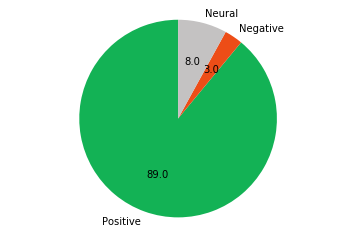

In [8]:
# The slice names of a sentiment distribution pie chart

pieLabels = ('Positive', 'Negative', 'Neural')

 

# Sentiment (in %) data

sentiment_share     = [positive_percent, negative_percent, neutral_percent]

colors  = ("#13b255", "#ed4d17", "#c4c2c2") 

figureObject, axesObject = plotter.subplots()

 

# Draw the pie chart

axesObject.pie(sentiment_share,
               colors = colors,
               labels = pieLabels,
               autopct = '%1.1f', 
               startangle=90)

 

# Aspect ratio - equal means pie is a circle

axesObject.axis('equal')

 

plotter.show()

In [9]:
# Getting all stopwords

stop = set(stopwords.words('english'))
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

## Cleaning the data

In [10]:
Strings_List = reviews
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
restricted_words = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','xe','xf','xd','xef','xa','xb','xba','xaa','xc','de','le','co','rt','gt','http','nan','inf','nhttps','\n']

def preprocess(elem):
    bracket_free = re.sub('[\(\[].*?[\)\]]', '', elem)
    special_char_free = re.sub('[^A-Za-z]+', ' ', bracket_free)
    stop_free = " ".join([j for j in special_char_free.lower().split() if j not in stop])
    punc_free = ''.join(k for k in stop_free if k not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    rest_free_words = ' '.join(i for i in normalized.split() if i not in restricted_words)
    return rest_free_words

Strings_List_clean = [preprocess(elem).split() for elem in Strings_List]

Strings_List_clean[0:10]

<input>:8: DeprecationWarning: invalid escape sequence \(
<input>:8: DeprecationWarning: invalid escape sequence \(
<input>:8: DeprecationWarning: invalid escape sequence \(
<input>:8: DeprecationWarning: invalid escape sequence \(
<input>:8: DeprecationWarning: invalid escape sequence \(
<input>:8: DeprecationWarning: invalid escape sequence \(
<input>:8: DeprecationWarning: invalid escape sequence \(
<input>:8: DeprecationWarning: invalid escape sequence \(
<input>:8: DeprecationWarning: invalid escape sequence \(
<input>:8: DeprecationWarning: invalid escape sequence \(
<input>:8: DeprecationWarning: invalid escape sequence \(
<input>:8: DeprecationWarning: invalid escape sequence \(
<input>:8: DeprecationWarning: invalid escape sequence \(
<input>:8: DeprecationWarning: invalid escape sequence \(
<input>:8: DeprecationWarning: invalid escape sequence \(
<input>:8: DeprecationWarning: invalid escape sequence \(
<input>:8: DeprecationWarning: invalid escape sequence \(
<input>:8: Dep

[['arrived',
  'abu',
  'road',
  'train',
  'delhi',
  'minuted',
  'drive',
  'shantiban',
  'wonderful',
  'place',
  'peace',
  'serenity',
  'found',
  'aspect',
  'next',
  'day',
  'took',
  'bus',
  'mt',
  'abu',
  'sanctuary',
  'great',
  'place',
  'spirituality',
  'course'],
 ['find',
  'hotel',
  'type',
  'budget',
  'much',
  'view',
  'remain',
  'active',
  'stay',
  'wide',
  'variety',
  'food',
  'available',
  'choice'],
 ['mount',
  'abu',
  'beautiful',
  'place',
  'view',
  'balcony',
  'amazing',
  'refreshing',
  'mesmerized',
  'beauty',
  'mountain',
  'hygienic',
  'clean',
  'place',
  'everyone',
  'go',
  'least'],
 ['definitely',
  'improve',
  'respect',
  'overall',
  'cleanliness',
  'guru',
  'shikhar',
  'view',
  'point',
  'nakki',
  'lake',
  'delwara',
  'temple',
  'nice'],
 ['best',
  'place',
  'go',
  'pm',
  'pro',
  'friendly',
  'spend',
  'good',
  'time',
  'family',
  'near',
  'bus',
  'stand',
  'main',
  'market',
  'con',
  'mu

## Topic Modeling

In [11]:
# Making the term dictionary
dictionary = corpora.Dictionary(Strings_List_clean)

# Making the corpus
corpus = [dictionary.doc2bow(text) for text in Strings_List_clean]

# Making the object for LDA model
Lda = gensim.models.ldamodel.LdaModel

ldamodel = Lda(corpus, num_topics=10, id2word = dictionary, passes=4)

pyLDAvis.display(pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary))

In [19]:
# 2. TIGER HILL

TIGER_page=requests.get("https://www.tripadvisor.in/Attriger 

In [20]:
# TIGER RATINGS

tag_list_1 = TIGERsoup.find_all(class_ = 'row_count row_cell')

for rating in tag_list_1 :
 print(rating.get_text())

42%
37%
15%
3%
3%


In [31]:
# TIGER REVIEW URLS


def getTripadvisorUrls(reviewCount):
    start_url = 'https://www.tripadvisor.in/Attraction_Review-g679012-d1654356-Reviews-or'
    end_url = '-Tiger_Hill-Darjeeling_Darjeeling_District_West_Bengal.html'
    start_value = 10
    end_value = reviewCount
    urls_list = []

    for i in range(10,end_value,10):
        full_url = start_url + str(i) + end_url
        urls_list.append(full_url)
    return urls_list

getTripadvisorUrls(60)




['https://www.tripadvisor.in/Attraction_Review-g679012-d1654356-Reviews-or10-Tiger_Hill-Darjeeling_Darjeeling_District_West_Bengal.html',
 'https://www.tripadvisor.in/Attraction_Review-g679012-d1654356-Reviews-or20-Tiger_Hill-Darjeeling_Darjeeling_District_West_Bengal.html',
 'https://www.tripadvisor.in/Attraction_Review-g679012-d1654356-Reviews-or30-Tiger_Hill-Darjeeling_Darjeeling_District_West_Bengal.html',
 'https://www.tripadvisor.in/Attraction_Review-g679012-d1654356-Reviews-or40-Tiger_Hill-Darjeeling_Darjeeling_District_West_Bengal.html',
 'https://www.tripadvisor.in/Attraction_Review-g679012-d1654356-Reviews-or50-Tiger_Hill-Darjeeling_Darjeeling_District_West_Bengal.html']

In [32]:
#TIGER REVIEWS

urls = getTripadvisorUrls(60)
reviews = []

for url in urls:
    # Get http object and soap object
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    # Find all reviews
    reviews_list = TIGERsoup.find_all('div',class_ = "prw_rup prw_reviews_text_summary_hsx")
    for review in reviews_list:
        reviews.append(review.get_text())

print(reviews)

['Mount Abu is famous hill station of Rajasthan which attracts lots of visitors, especially from Gujarat.', 'An overnight journey from delhi by rajdhani ..and a 1 hr drive from abu road station..the taxi charges 1000 for an innova. And 800 for a dezire..\nLoads of places to stay srp inn is one of the best..very clean and great food..', 'If you hail from north, there are better hill stations you can plan to visit in uttrakand and himachal then to go all the way to mount abu. The only thing good in this hill station is nakki lake and dilwara temple. So one day...More', 'Let me tell you that I live by myself and quite enjoy alone time, peace, quietness and all. Hence I chose Mount Abu as a quick detour during my tour of Rajasthan. I went there with somewhat high expectations as a friend visited that place...More', 'Since Mount Abu is quiet near to Northern Gujarat Border, one should expect heavy Gujju visitors (usually for drinks). Overall it is quiet clean but an expensive destination be

In [33]:
# 3. KACHANJANGHA HILL

TIGER_page=requests.get("https://www.tripadvisor.in/Attraction_Review-g304557-d1191089-Reviews-Tiger_Hill-Darjeeling_Darjeeling_District_West_Bengal.html")
TIGERsoup = BeautifulSoup(ABU_page.content,'html.parser')

In [8]:
# KANCHANJANGHA RATINGS

tag_list_1 = ABUsoup.find_all(class_ = 'row_count row_cell')

for rating in tag_list_1 :
 print(rating.get_text())

NameError: name 'ABUsoup' is not defined

In [44]:
# TIGER REVIEW URLS


def getTripadvisorUrls(reviewCount):
    start_url = 'https://www.tripadvisor.in/Attraction_Review-g304557-d3268050-Reviews-or'
    end_url = '-Kanchenjunga_Mountain-Darjeeling_Darjeeling_District_West_Bengal.html'
    start_value = 10
    end_value = reviewCount
    urls_list = []

    for i in range(10,end_value,10):
        full_url = start_url + str(i) + end_url
        urls_list.append(full_url)

    return urls_list

getTripadvisorUrls(50)


['https://www.tripadvisor.in/Attraction_Review-g304557-d3268050-Reviews-or10-Kanchenjunga_Mountain-Darjeeling_Darjeeling_District_West_Bengal.html',
 'https://www.tripadvisor.in/Attraction_Review-g304557-d3268050-Reviews-or20-Kanchenjunga_Mountain-Darjeeling_Darjeeling_District_West_Bengal.html',
 'https://www.tripadvisor.in/Attraction_Review-g304557-d3268050-Reviews-or30-Kanchenjunga_Mountain-Darjeeling_Darjeeling_District_West_Bengal.html',
 'https://www.tripadvisor.in/Attraction_Review-g304557-d3268050-Reviews-or40-Kanchenjunga_Mountain-Darjeeling_Darjeeling_District_West_Bengal.html']

In [45]:
#TIGER REVIEWS

urls = getTripadvisorUrls(60)
reviews = []

for url in urls:
    # Get http object and soap object
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    # Find all reviews
    reviews_list = soup.find_all('div',class_ = "prw_rup prw_reviews_text_summary_hsx")
    for review in reviews_list:
        reviews.append(review.get_text())

print(reviews)

['The view of Kanchenjunga Mountain Ranges form Tiger Hills is the best, you can view the full range at the time of sunrise, the view of the snow peaks when first sun rays fall is the best , the mountain converts to gold and slowly...More', 'The amazing view from Darjeeling specially from the Tiger Hills. You can see it perfectly the whole chain of mountains.', 'Feel like god is sleeping. Sleeping Buddha. Awesome sunrise and sunset view from different places. Specially at moonlit night. View from rin-chen-pong is superb. The peak is very closed to phalut and the view from sandakhphu and phalut is awesome.', "ow my god this was a amazing experience of mine to see kanchenjungha from tiger hill..as well as sun rising..its can't b explained by words... I was just speechless.. evry one should visit this placw", 'Awesome vie of kanchanjunga you will get it from tiger point, but for that you will have to go early in the morning at 4-4:30, if you are late it will be too crowded to get place to

In [34]:
# 4 Velliangiri Mountains

VALL_page=requests.get("https://www.tripadvisor.in/Attraction_Review-g297675-d3873307-Reviews-Velliangiri_Mountains-Coimbatore_Coimbatore_District_Tamil_Nadu.html")
VALLsoup = BeautifulSoup(VALL_page.content,'html.parser')

In [35]:
#VALL RATINGS
tag_list_1 = VALLsoup.find_all(class_ = 'row_count row_cell')

for rating in tag_list_1 :
 print(rating.get_text())


76%
19%
5%
0%
0%


In [39]:
#VALL REVIEW URL


def getTripadvisorUrls(reviewCount):
    start_url = 'https://www.tripadvisor.in/Attraction_Review-g304557-d3268050-Reviews-or'
    end_url = '-Velliangiri_Mountains-Coimbatore_Coimbatore_District_Tamil_Nadu.html'
    start_value = 10
    end_value = reviewCount
    urls_list = []

    for i in range(10,end_value,10):
        full_url = start_url + str(i) + end_url
        urls_list.append(full_url)

    return urls_list

getTripadvisorUrls(60)

['https://www.tripadvisor.in/Attraction_Review-g304557-d3268050-Reviews-or10-Velliangiri_Mountains-Coimbatore_Coimbatore_District_Tamil_Nadu.html',
 'https://www.tripadvisor.in/Attraction_Review-g304557-d3268050-Reviews-or20-Velliangiri_Mountains-Coimbatore_Coimbatore_District_Tamil_Nadu.html',
 'https://www.tripadvisor.in/Attraction_Review-g304557-d3268050-Reviews-or30-Velliangiri_Mountains-Coimbatore_Coimbatore_District_Tamil_Nadu.html',
 'https://www.tripadvisor.in/Attraction_Review-g304557-d3268050-Reviews-or40-Velliangiri_Mountains-Coimbatore_Coimbatore_District_Tamil_Nadu.html',
 'https://www.tripadvisor.in/Attraction_Review-g304557-d3268050-Reviews-or50-Velliangiri_Mountains-Coimbatore_Coimbatore_District_Tamil_Nadu.html']

In [40]:
#VALL REVIEWS

urls = getTripadvisorUrls(60)
reviews = []

for url in urls:
    # Get http object and soap object
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    # Find all reviews
    reviews_list = soup.find_all('div',class_ = "prw_rup prw_reviews_text_summary_hsx")
    for review in reviews_list:
        reviews.append(review.get_text())

print(reviews)

['The view of Kanchenjunga Mountain Ranges form Tiger Hills is the best, you can view the full range at the time of sunrise, the view of the snow peaks when first sun rays fall is the best , the mountain converts to gold and slowly...More', 'The amazing view from Darjeeling specially from the Tiger Hills. You can see it perfectly the whole chain of mountains.', 'Feel like god is sleeping. Sleeping Buddha. Awesome sunrise and sunset view from different places. Specially at moonlit night. View from rin-chen-pong is superb. The peak is very closed to phalut and the view from sandakhphu and phalut is awesome.', "ow my god this was a amazing experience of mine to see kanchenjungha from tiger hill..as well as sun rising..its can't b explained by words... I was just speechless.. evry one should visit this placw", 'Awesome vie of kanchanjunga you will get it from tiger point, but for that you will have to go early in the morning at 4-4:30, if you are late it will be too crowded to get place to

In [45]:
#5 Triund Hill
Triund_page=requests.get("https://www.tripadvisor.in/Attraction_Review-g1092107-d1383036-Reviews-Triund_Hill-McLeod_Ganj_Dharamsala_Kangra_District_Himachal_Pradesh.html")
Triundsoup = BeautifulSoup(Triund_page.content,'html.parser')

In [46]:
#Triund RATING

tag_list_1 = Triundsoup.find_all(class_ = 'row_num is-shown-at-tablet')

for rating in tag_list_1 :
 print(rating.get_text())

948
330
60
14
5


In [47]:
#Triund REVIEW URLS


def getTripadvisorUrls(reviewCount):
    start_url = 'https://www.tripadvisor.in/Attraction_Review-g679012-d1654356-Reviews-or'
    end_url = '-Triund_Hill-McLeod_Ganj_Dharamsala_Kangra_District_Himachal_Pradesh.html'
    start_value = 10
    end_value = reviewCount
    urls_list = []

    for i in range(10,end_value,10):
        full_url = start_url + str(i) + end_url
        urls_list.append(full_url)

    return urls_list

getTripadvisorUrls(60)


['https://www.tripadvisor.in/Attraction_Review-g679012-d1654356-Reviews-or10-Triund_Hill-McLeod_Ganj_Dharamsala_Kangra_District_Himachal_Pradesh.html',
 'https://www.tripadvisor.in/Attraction_Review-g679012-d1654356-Reviews-or20-Triund_Hill-McLeod_Ganj_Dharamsala_Kangra_District_Himachal_Pradesh.html',
 'https://www.tripadvisor.in/Attraction_Review-g679012-d1654356-Reviews-or30-Triund_Hill-McLeod_Ganj_Dharamsala_Kangra_District_Himachal_Pradesh.html',
 'https://www.tripadvisor.in/Attraction_Review-g679012-d1654356-Reviews-or40-Triund_Hill-McLeod_Ganj_Dharamsala_Kangra_District_Himachal_Pradesh.html',
 'https://www.tripadvisor.in/Attraction_Review-g679012-d1654356-Reviews-or50-Triund_Hill-McLeod_Ganj_Dharamsala_Kangra_District_Himachal_Pradesh.html']

In [48]:
#Triund REVIEWS

urls = getTripadvisorUrls(50)
reviews = []

for url in urls:
    # Get http object and soap object
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    # Find all reviews
    reviews_list = ABUsoup.find_all('div',class_ = "prw_rup prw_reviews_text_summary_hsx")
    for review in reviews_list:
        reviews.append(review.get_text())

print(reviews)

['Mount Abu is famous hill station of Rajasthan which attracts lots of visitors, especially from Gujarat.', 'An overnight journey from delhi by rajdhani ..and a 1 hr drive from abu road station..the taxi charges 1000 for an innova. And 800 for a dezire..\nLoads of places to stay srp inn is one of the best..very clean and great food..', 'If you hail from north, there are better hill stations you can plan to visit in uttrakand and himachal then to go all the way to mount abu. The only thing good in this hill station is nakki lake and dilwara temple. So one day...More', 'Let me tell you that I live by myself and quite enjoy alone time, peace, quietness and all. Hence I chose Mount Abu as a quick detour during my tour of Rajasthan. I went there with somewhat high expectations as a friend visited that place...More', 'Since Mount Abu is quiet near to Northern Gujarat Border, one should expect heavy Gujju visitors (usually for drinks). Overall it is quiet clean but an expensive destination be

In [50]:
# 6. Guru Shikhar

GURU_page=requests.get("https://www.tripadvisor.in/Attraction_Review-g679012-d1654356-Reviews-Mount_Abu-Mount_Abu_Sirohi_District_Rajasthan.html")
ABUsoup = BeautifulSoup(ABU_page.content,'html.parser')